# Porto Seguro’s Safe Driver Prediction

https://www.kaggle.com/c/porto-seguro-safe-driver-prediction

In this competition, You challenged to build a model that predict the probability the driver will initiate an auto insurance claim in next year. While Porto Seguro has used machine learning for the post 20 years, they are looking for kaggle machine learning community to explore new, more powerful methods. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.

> 이 대회에서 당신은 운전자가 내년에 자동차 보험 청구를 시작할 가능성을 예측하는 모델을 만드는 것에 도전했다. 포르토 세구로가 20년 동안 기계 학습을 사용했지만, 그들은 새롭고 더 강력한 방법을 탐구하기 위해 카글 기계 학습 커뮤니티를 찾고 있다. 좀 더 정확한 예측은 그들이 가격을 더 조정할 수 있게 해 줄 것이고, 희망컨대 더 많은 운전자들이 자동차 보험 혜택을 받을 수 있게 해줄 것이다.

# Introduction

This notebook aims at getting a good insight in the data for the PortoSeguro competition. Besides that, it gives some tips and tricks to prepare your data for modeling. The notebook consists of the following main sections:

> 이 노트북은 PortoSeguro 대회에 대한 인사이트를 얻는데 초첨이 맞추어져 있다. 게다가 모델을 생성하기 위한 몇가지 팁과 트릭을 제공합니다. 이 노트북은 다음과 같은 색션으로 구성됩니다.

1. [Visual inspect of your data](#visual_inspection)
1. [Defining the metadata](#metadata)
1. [Descriptive statistics](#descriptive_stats)
1. [Handling imbalanced classes](#imbalance_data)
1. [Data quality checks](#data_quality)
1. [Exploratory Data visualization](#eda)
1. [Feature engineering](#feat_engineering)
1. [Feature selection](#feat_selection)
1. [Feature scaling](#feat_scaling)

<a class="anchor" id="visual_inspection"></a>

# 1. Visual inspect of your data.

## 1-1. Loading packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

- Imputer : null 값, 비어있는 값을 채움
- PolynomialFeatures : 입력값을 다항식으로 변환
- VarianceThreshold :  분산이 적은(=중요도가 낮은) 칼럼을 제거
- SelectFromModel : 중요도에 따라 변수를 선택
- Shuffle : 배열, 행렬을 일관된 방식으로 섞음
- RandomForestClassifier : 다양한 하위 샘플에 다수의 의사 결정트리로 분류
- pd.set_option('display.max_columns', 100) : 화면에 보여줄 열의 개수

## 1-2. Loading data

In [2]:
train = pd.read_csv('../../input/porto/train.csv')
test = pd.read_csv('../../input/porto/test.csv')
train.shape

(595212, 59)

In [3]:
# 일부분만 추출하고 싶을 떄
# 0.1로 설정하면 10%만 불러옴
train = train.sample(frac=0.1)
train.shape

(59521, 59)

## 1-3. Data at first sight

Here is an excerpt of the data description for competition:

- Features that belong to **similar groupings are tagged** as such in the feature names (e.g., ind, reg, car, calc)
- Feature names include the post-fix **bin** to indicate binary features and **cat** to indicate categorical features.
- Features **without these designations are either continuous or ordinal.**
- Values of **-1** indicate that the feature was **missing** from the observation.
- The **Target** columns signifies whether or not a claim was filed for that policy holder.

Ok, that's important information to get us started. Let's have a quick look at the first and last rows to confirm all of this.


> 해당 대회의 설명에서 발췌한 내용이다.
- 각 칼럼은 비슷한 그룹 이름으로 되어 있다. (ind, reg, car, calc)
- 바이러니 데이터는 bin, 카테도리 데이터는 cat이 포함된다.
- 이런 태그가 없는 것은 연속형 혹은 순서형 데이터이다.
- -1은 빈 값을 의미한다.
- Target은 청주 여부를 의미한다.   
    

In [4]:
train.head(2)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
237643,593585,0,4,1,3,0,0,0,1,0,0,0,0,0,0,0,5,1,0,0,0.8,0.6,1.246244,6,1,-1,1,0,0,1,1,0,1,75,2,0.447214,1.225706,0.444072,3.464102,0.9,0.5,0.0,3,1,8,2,11,2,10,5,1,3,6,1,0,0,0,1,0
331630,828628,0,0,4,9,1,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.1,0.2,-1.000000,11,1,-1,0,-1,0,1,0,0,1,46,3,0.400000,0.860389,0.366333,3.741657,0.7,0.6,0.7,2,2,9,4,9,2,8,8,0,3,6,0,1,0,1,0,0


In [5]:
train.tail(2)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
228904,572185,0,1,1,7,1,0,0,0,1,0,0,0,0,0,0,7,1,0,0,0.6,0.2,0.687386,11,1,-1,0,-1,1,1,1,2,1,40,2,0.423792,0.670512,0.385357,2.645751,0.1,0.6,0.1,3,4,5,2,10,1,20,2,3,0,8,0,1,1,1,1,0
435463,1088138,0,2,1,10,0,0,1,0,0,0,0,0,0,0,0,13,1,0,0,0.0,0.0,0.763217,7,1,-1,0,-1,11,1,1,2,1,99,2,0.316228,0.595628,0.368782,2.645751,0.0,0.8,0.6,3,0,6,3,9,2,7,9,0,6,9,0,0,0,0,1,0


We indeed see the following
- binary variables
- categorical variables of which the category values are integers
- other variables with integer or float values
- variables with -1 representing missing values
- the target variable and an ID variable


> 우리는 이걸 알 수 있다.
- 바이러니 값
- 카테고리 값이 정수
- 다른 값은 정수 아님 소수 값
- -1은 결측치
- 타겟값과 ID값

In [6]:
# 각 칼럼을 반복하면서 유니크 값을 추출
for col in [col for col in train.columns if 'cat' in col]:
    print(col, train[col].unique())

ps_ind_02_cat [ 1  4  2  3 -1]
ps_ind_04_cat [ 0  1 -1]
ps_ind_05_cat [ 0  6  2  4  1 -1  3  5]
ps_car_01_cat [ 6 11  7  5  8 10  4  9  2 -1  3  0  1]
ps_car_02_cat [ 1  0 -1]
ps_car_03_cat [-1  1  0]
ps_car_04_cat [1 0 2 6 8 9 3 5 7 4]
ps_car_05_cat [ 0 -1  1]
ps_car_06_cat [ 0 11  1  3 15 14 10  9  7 16 13  4  5  6  2 17  8 12]
ps_car_07_cat [ 1  0 -1]
ps_car_08_cat [1 0]
ps_car_09_cat [ 0  2  1 -1  3  4]
ps_car_10_cat [1 0 2]
ps_car_11_cat [ 75  46  36  25 102  99  10 103  97 100   2  64  65  80 104  40  87  83
  57  78  21  53  18  62  55  49  52  88  71   1  82  20  19  22  29  60
  54  35  84  98  28  58   7  27  70  85  13  76  81  44  38  50  77   5
  61  45  91  32   8 101  11  48  63  30  89  33  23  67   3   9  37  95
  31  51  16  39  68  74  94  12  92  34  26  43  15  59  17  56  90  72
  66  24   4  42   6  79  93  41  14  96  47  86  73  69]


In [7]:
# Let's look at the number of rows and columns in the train data.
train.shape

(59521, 59)

We have 59 variables and 592,212 rows. Lets's see if we have the same number of variables in the test data. Let's see if there are duplicate rows the training data.

In [8]:
# No Duplicate rows, so that;s fine.
train.drop_duplicates()
train.shape

(59521, 59)

No duplicate rows, so that's fine.

In [9]:
test.shape

(892816, 58)

We're missing one variable in the test set, but this is the target variables. So that's fine.
Let's now investigate how many variables of each type we have.

So later on we can create dummy variables for the 14 categorical variables. The *bin* variables are already binary and do not need dummification.

> 테스트 데이터테서는 하나의 테스트 셋이 결측치이지만 타켓값이라 큰 상관없다. 각 타입별로 얼마나 많은 값을 가지고 있는지 조사해보자. 14개의 카테고리 값으로 테이블을 만들어본다. bin 데이터는 이미 바이러니 값이므로 이번에는 필요없다.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59521 entries, 237643 to 435463
Data columns (total 59 columns):
id                59521 non-null int64
target            59521 non-null int64
ps_ind_01         59521 non-null int64
ps_ind_02_cat     59521 non-null int64
ps_ind_03         59521 non-null int64
ps_ind_04_cat     59521 non-null int64
ps_ind_05_cat     59521 non-null int64
ps_ind_06_bin     59521 non-null int64
ps_ind_07_bin     59521 non-null int64
ps_ind_08_bin     59521 non-null int64
ps_ind_09_bin     59521 non-null int64
ps_ind_10_bin     59521 non-null int64
ps_ind_11_bin     59521 non-null int64
ps_ind_12_bin     59521 non-null int64
ps_ind_13_bin     59521 non-null int64
ps_ind_14         59521 non-null int64
ps_ind_15         59521 non-null int64
ps_ind_16_bin     59521 non-null int64
ps_ind_17_bin     59521 non-null int64
ps_ind_18_bin     59521 non-null int64
ps_reg_01         59521 non-null float64
ps_reg_02         59521 non-null float64
ps_reg_03         59521

Again, with the info() method we see that the the data type is integer or float. No null values are present in the data set. That's normal because missing values are replaced by -1. We'll look into that later.

<a class="anchor" id="metadata"></a>

## 2. Defining the metadata

To facilitate the data management, we'll store meta-information about the variables in a DataFrame. This is helpful when we want to select specific variables for analysis, visualization, modeling, ....

Concretely we will store:
- **role** : input, ID, target
- **level** : normal, interval, ordinal, binary
- **keep** : True or False
- **dtype** : int, float, str

> 데이터 관리를 위해, 각 변수들을 메타데이터로 만든다. 이는 분석, 시각화, 모델링을 위한 작업을 위한 특별한 변수를 선택하는데 유용하다.

In [11]:
data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
    
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'normal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
    
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict={
        'varname':f,
        'role':role,
        'level':level,
        'keep':keep,
        'dtype':dtype
    }
    data.append(f_dict)

meta = pd.DataFrame(data, columns='varname role level keep dtype'.split())
meta.set_index('varname', inplace=True)

In [12]:
# Show metadata Dataframe.
meta.head()

,role,level,keep,dtype
varname,,,,
id,id,normal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,normal,True,int64
ps_ind_03,input,ordinal,True,int64


In [13]:
# Example to extract all nominal variables that are not dropped.
meta[(meta.level=='nominal')&(meta.keep)].index

Index([], dtype='object', name='varname')

In [14]:
# Below the number of variables per role and level are displayed.
pd.DataFrame({'count':meta.groupby(['role','level'])['role'].size()}).reset_index()

,role,level,count
0,id,normal,1
1,input,binary,17
2,input,interval,10
3,input,normal,14
4,input,ordinal,16
5,target,binary,1


<a class='anchor' id='descriptive_stats'></a>

# 3. Descriptive statistics

We can also apply the describe method no the dataframe. However, it doesn't make much sense to calculate the mean, std, ... on categorical variables and the id variable. We'll explore the categorical variables visually later.

Thanks to our meta file we can easily select the variables on which we want to compute the descriptive statistics. To keep things clear, we'll do this per data type.

## 3-1. Interval variables

In [15]:
v = meta[(meta.level=='interval')&(meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000
mean,0.611979,0.440125,0.552973,0.380390,0.814602,0.276590,3.069259,0.447462,0.450207,0.447936
std,0.286834,0.403414,0.791836,0.058581,0.225640,0.356795,0.728540,0.287375,0.286679,0.287087
min,0.000000,0.000000,-1.000000,0.141421,0.313241,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525595,0.316228,0.672005,0.332415,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.721543,0.374166,0.766054,0.368782,3.316625,0.400000,0.500000,0.400000
75%,0.900000,0.600000,0.999687,0.400000,0.908943,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,2.947457,1.264911,3.720626,0.609918,3.741657,0.900000,0.900000,0.900000


#### reg variables
- only ps_reg_03 has missing values
- the range (min to max) differs between the variables. We could apply scaling (e.g. StandardScaler), but it depends on the classifier we will want to use.

#### car variable
- ps_car_12 and ps_car_15 have missing values
- again, the range differs and we could apply scaling.

#### calc variables
- no missing values
- this seems to be some kind of ratio as the maximum is 0.9
- all three_calc variables have very similar distributions

**Overall**, we can see that the range of the interval variables is rather small. Perhaps some transformation(e.g. log) is already applied in order to anonymize the data?

## 3-2. Ordinal variables

In [16]:
v = meta[(meta.level=='ordinal')&(meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000
mean,1.909881,4.436367,0.012819,7.296030,2.350414,2.375666,1.886107,7.691890,3.001310,9.237177,2.335814,8.450564,5.445725,1.452009,2.869827,7.543186
std,1.991972,2.703161,0.127081,3.552865,0.827619,1.118591,1.136211,1.334059,1.417559,1.458710,1.245380,2.907954,2.336297,1.207247,1.695877,2.735308
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,3.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,24.000000,18.000000,10.000000,12.000000,23.000000


- Only one missing variable: ps_car_11
- We could apply scaling to deal with the different ranges


## 3-3. Binary variables

In [17]:
v = meta[(meta.level=='binary')&(meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000,59521.000000
mean,0.037399,0.393475,0.257590,0.161573,0.187362,0.000336,0.001411,0.010097,0.000974,0.662741,0.119840,0.153778,0.122511,0.631172,0.557316,0.287310,0.348549,0.153996
std,0.189738,0.488525,0.437311,0.368062,0.390205,0.018328,0.037541,0.099977,0.031201,0.472778,0.324777,0.360739,0.327878,0.482491,0.496708,0.452511,0.476515,0.360948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- A priori in the train data is 3.645%, which is **strongly imbalanced**.
- From the means we can conclude that for most variables is zero in most cases.

<a class="anchor" id="imbalance_data"></a>

# 4. Handling imbalanced classes

As we mentioned above the proportion of records with target=1 is far less than target=0. This can lead to a model that has great accuracy but does have any added value in practice. Two possible to deal with this problem are:

- oversampling records with target=1
- undersampling records with target=0

There are many more strategies of course and MachineLerningMastery.com gives a [nice overview]((https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/). AS we have a rather large training set, we can go for **undersampling**.

> 타겟 값을 보면 대부분이 0이고 아주 소수만 1이 있다. 100명이 있으면 대략 97명이 보험금을 수령하지 못했고 3명만이 수령한 정도이다.
> 그래서 3명분의 값을 늘리고 97명의 값을 줄인다.
- oversampling은 타켓값이 1인 사람(보험금을 받은 사람)의 경우를 늘리는 것
- undersampling은 타켓삾이 0인 사람(보험금을 받지 못한 사람)의 경우른 줄이는 것
- 원리 : SMOTE : 타겟값과 비슷한 점을 뽑고 그 사이에 임의의 값을 생성

In [18]:
desired_apriori=0.10

# Get the indices per targetr value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index 

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersmpling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampling_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampling_nb_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampling_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34966401954795356
Number of records with target=0 after undersampling: 20034


<a class="anchor" id="data_quality"></a>

# 5. Data Quality Checks

## 5-1. Checking missing values

Missings are represented as -1

In [19]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_prec = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_prec))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 12 records (0.05%) with missing values
Variable ps_ind_04_cat has 7 records (0.03%) with missing values
Variable ps_ind_05_cat has 253 records (1.14%) with missing values
Variable ps_reg_03 has 3906 records (17.55%) with missing values
Variable ps_car_01_cat has 8 records (0.04%) with missing values
Variable ps_car_03_cat has 15256 records (68.54%) with missing values
Variable ps_car_05_cat has 9833 records (44.17%) with missing values
Variable ps_car_07_cat has 510 records (2.29%) with missing values
Variable ps_car_09_cat has 26 records (0.12%) with missing values
Variable ps_car_14 has 1641 records (7.37%) with missing values
In total, there are 10 variables with missing values


- **ps_car_03_cat and ps_car_05_cat** have large proportion of records with missing values. Remove these variables.
- For the other categorical variables with missing values, we can leave the missing value -1 as such.
- **ps_reg_03** (continuous) has missing values for 18% of all records. Replace by the mean.
- **ps_car_11** (ordinal) has only 5 records with missing values. Replace by the mode.
- **ps_car_12** (continuous) has only 1 records with missing value. replace by the mean.
- **ps_car_14** (continuous) has missing values for 7% of all records. Replace by the mean.

> ps_car_03_cat은 -1이 70% 정도를 차지
- ps_car_03_cat and ps_car_05_cat 값을 삭제 처리

In [20]:
# ps_car_03_cat의 -1의 평균을 살펴본다.
train[['ps_car_03_cat','target']].groupby('ps_car_03_cat').mean()

,target
ps_car_03_cat,
-1,0.088818
0,0.113283
1,0.131573


In [21]:
# 어떤 의미를 가지는지 확인해보자
temp_series = train[['ps_car_01_cat', 'ps_car_02_cat', 'ps_reg_03']].groupby(['ps_car_01_cat', 'ps_car_02_cat']).mean()

In [22]:
temp_series.reset_index(inplace=True)
temp_series_merge = train.loc[train['ps_reg_03']==-1].merge(temp_series, on=['ps_car_01_cat', 'ps_car_02_cat'], how='left')
temp_series_merge.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03_x,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_reg_03_y
0,563177,0,6,2,5,1,0,0,1,0,0,0,0,0,0,0,5,1,0,0,0.2,0.3,-1.0,6,1,-1,0,1,0,1,1,0,1,22,3,0.316228,0.811590,0.374566,3.741657,0.1,0.0,0.6,2,3,8,1,10,2,3,5,3,1,9,0,1,1,0,0,1,0.409331
1,317372,0,2,1,8,1,0,0,0,1,0,0,0,0,0,0,9,1,0,0,0.3,0.6,-1.0,9,1,1,0,1,1,1,1,2,1,64,3,0.316228,0.657443,0.301662,3.162278,0.9,0.9,0.7,2,2,9,2,10,2,13,7,1,3,7,0,0,0,1,0,0,0.488386
2,186772,0,3,2,3,0,0,0,0,1,0,0,0,0,0,0,8,0,1,0,0.3,0.2,-1.0,7,1,-1,2,-1,0,0,1,2,1,100,0,0.399750,0.822350,0.423084,3.464102,0.8,0.0,0.8,2,3,8,3,11,3,6,3,2,3,7,0,0,1,0,0,0,0.340946
3,989193,0,0,1,9,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.5,-1.0,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316228,0.643852,0.368511,3.000000,0.5,0.9,0.2,2,1,9,5,8,3,9,9,1,3,6,0,1,1,0,0,0,0.747089
4,207385,0,2,1,3,0,0,0,0,0,1,0,0,0,0,0,8,1,0,0,0.3,0.0,-1.0,6,0,-1,0,1,14,1,1,0,1,104,2,0.447214,0.941798,0.434971,3.000000,0.9,0.6,0.9,3,2,8,3,6,1,6,5,2,3,8,0,1,0,0,0,0,0.534289


In [23]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop), 'keep'] = False # Updating the meta

# Imputing with the mean or mode
mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mean_imp.fit_transform(train[['ps_car_11']]).ravel()

## 5-2. Checking the cardinality of the categorical variables

Cardinality refers to the number of different values in a variable. As we will create dummy variables from the categorical variables later on, we need to check whether there are variables with many distinct values. We should handle these variables differently as they would result in many dummy variables.

In [24]:
v = meta[(meta.level == 'normal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 2 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


In [25]:
# f값 확인하는 방법
train[f].unique()

array([ 71,  93,  28,  22,  90, 102,  64,  98,  23,  48, 100,  25,   2,
        42, 104, 103,  52,  43,  82,  38,  84,   5,  80,   7,  12,  57,
        37,  53,  66,  95,  91,  83,  27,  78,  81,  41,  74,  85,  51,
        73,  46,  65,   4,  88,  60,  40,   6,  62,  26,  31,  68,  92,
       101,  44,  70,  10,  34,  11,  79,  89,  87,  99,  24,   8,  77,
        76,  75,  63,  29,  49,  16,  56,  17,  67,  32,  39,  30,  36,
         1,  19,  55,  21,  45,  86,  54,   3,  47,  96,  72,  13,  14,
        61,  20,  15,   9,  94,  59,  69,  97,  50,  58,  18,  33,  35])

Only **ps_car_11_cat** has many distinct values, although it is still reasonable.

**EDIT** : nickycan made an excellent remark on the fact that my first solution could lead to data leakage. He also pointed me to another kernel made by oilver which deals with that. I therefore replaced this part with the kernel of oliver. All credits go to him. It is so great what you can learn by paricipating in the Kaggle competitions :)

> mean_encoding 개념 설명.

In [26]:
# Script by https://www.kaggle.com/ogrellier
# Code : http://www.kaggle.com/ogrellier.python-target-encoding-for-categorical-features

def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, tst_series=None, target=None, min_samples_leaf=1, smoothing=1, noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca.
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior
    """
    
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    
    # Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean','count'])

    # Comput smoothing
    smoothing = 1 / (1 + np.exp(-(averages['count'] - min_samples_leaf)/smoothing))
    
    # Apply average function to all target data
    prior = target.mean()
    
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1-smoothing) + averages['mean'] * smoothing
    averages.drop('mean count'.split(), axis=1, inplace=True)
    
    # Apply average to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index':target.name, target.name:'average'}), 
        on=trn_series.name, 
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index':target.name, target.name:'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
     
    # pd.merge dose not keep the index so restore it
    ft_tst_series.index = tst_series.index
    
    return add_noise(ft_tst_series, noise_level), add_noise(ft_tst_series, noise_level)

In [27]:
# 위 target_encode을 하나씩 풀어서 작성해본다.
trn_series=train['ps_car_11_cat']
tst_series=test['ps_car_11_cat']
target=train.target
min_samples_leaf=100
smoothing=10
noise_level=0.01

In [28]:
assert len(trn_series) == len(target)
assert trn_series.name == tst_series.name
temp = pd.concat([trn_series, target], axis=1)
temp.head()

,ps_car_11_cat,target
0,71,0
1,93,0
2,28,0
3,22,0
4,90,0


In [29]:
averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean', 'count'])
averages.head()

,mean,count
ps_car_11_cat,,
1,0.101562,128
2,0.193878,98
3,0.129630,108
4,0.180328,61
5,0.119141,512


In [30]:
# groupby에서 여러개의 정보를 얻을 때는 agg()에 함수를 적용할 수도 있다.
def max_min(x):
    return x.max() - x.min()

averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean', 'count', max_min]).reset_index()
averages.head()

,ps_car_11_cat,mean,count,max_min
0,1,0.101562,128,1
1,2,0.193878,98,1
2,3,0.129630,108,1
3,4,0.180328,61,1
4,5,0.119141,512,1


In [31]:
averages['count'].head()

0    128
1     98
2    108
3     61
4    512
Name: count, dtype: int64

In [32]:
(averages['count'] - min_samples_leaf).head()

0     28
1     -2
2      8
3    -39
4    412
Name: count, dtype: int64

In [33]:
smoothing = 1 / (1 + np.exp(-(averages['count'] - min_samples_leaf)/smoothing))
smoothing.head()

0    0.942676
1    0.450166
2    0.689974
3    0.019840
4    1.000000
Name: count, dtype: float64

In [34]:
prior = target.mean()
prior

0.1

In [35]:
averages['mean'].head() 

0    0.101562
1    0.193878
2    0.129630
3    0.180328
4    0.119141
Name: mean, dtype: float64

In [36]:
averages.head()

,ps_car_11_cat,mean,count,max_min
0,1,0.101562,128,1
1,2,0.193878,98,1
2,3,0.129630,108,1
3,4,0.180328,61,1
4,5,0.119141,512,1


In [37]:
averages[target.name] = prior * (1-smoothing) + averages['mean'] * smoothing
averages.drop('mean count'.split(), axis=1, inplace=True)

In [38]:
averages.head()

,ps_car_11_cat,max_min,target
0,1,1,0.101473
1,2,1,0.142260
2,3,1,0.120444
3,4,1,0.101594
4,5,1,0.119141


In [39]:
merge_1 = trn_series.to_frame(trn_series.name)
merge_1.head()

,ps_car_11_cat
0,71
1,93
2,28
3,22
4,90


In [40]:
merge_2 = averages.reset_index().rename(columns={'index': target.name, target.name:'averages'})
merge_2.head()

,target,ps_car_11_cat,max_min,averages
0,0,1,1,0.101473
1,1,2,1,0.142260
2,2,3,1,0.120444
3,3,4,1,0.101594
4,4,5,1,0.119141


In [41]:
ft_trn_series = pd.merge(merge_1, 
             merge_2, 
             on=trn_series.name, 
             how='left').averages.rename(trn_series.name + '_mean').fillna(prior)
ft_trn_series.head()

0    0.106035
1    0.144591
2    0.114607
3    0.087349
4    0.154247
Name: ps_car_11_cat_mean, dtype: float64

In [42]:
merge_3 = tst_series.to_frame(tst_series.name)
merge_3.head()

,ps_car_11_cat
0,65
1,103
2,29
3,40
4,101


In [43]:
merge_4 = averages.reset_index().rename(columns={'index':target.name, target.name:'average'})
merge_4.head()

,target,ps_car_11_cat,max_min,average
0,0,1,1,0.101473
1,1,2,1,0.142260
2,2,3,1,0.120444
3,3,4,1,0.101594
4,4,5,1,0.119141


In [44]:
ft_trn_series.index = trn_series.index
ft_tst_series = pd.merge(
    merge_3,
    merge_4,
    on=tst_series.name,
    how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
ft_tst_series.head()

0    0.105405
1    0.076923
2    0.096974
3    0.098267
4    0.076087
Name: ps_car_11_cat_mean, dtype: float64

In [45]:
ft_tst_series.index = tst_series.index


In [46]:

def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))


In [47]:
train_encoded = add_noise(ft_tst_series, noise_level)
test_encoded = add_noise(ft_tst_series, noise_level)

====

In [48]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
test['ps_car_11_cat_te'] = test_encoded

위 코드 train_encoded, test_encoded를 하나씩 까본다.

In [49]:
train['ps_car_11_cat_te'] = train_encoded
train['ps_car_11_cat_te'].head()

0    0.104143
1    0.078014
2    0.098839
3    0.098893
4    0.075436
Name: ps_car_11_cat_te, dtype: float64

In [50]:
test['ps_car_11_cat_te'] = test_encoded
test['ps_car_11_cat_te'].head()

0    0.105055
1    0.077042
2    0.096801
3    0.099588
4    0.075996
Name: ps_car_11_cat_te, dtype: float64

In [51]:
meta.loc['ps_car_11_cat','keep'] = False
meta.loc['ps_car_11_cat','keep']

False

<a class="anchor" id="eda"></a>

# 6.Exploratory Data Visualization

## 6-1. Categorical variables

Let's look into the categorical variables and the proportion of customers with target =1

<Figure size 432x288 with 0 Axes>

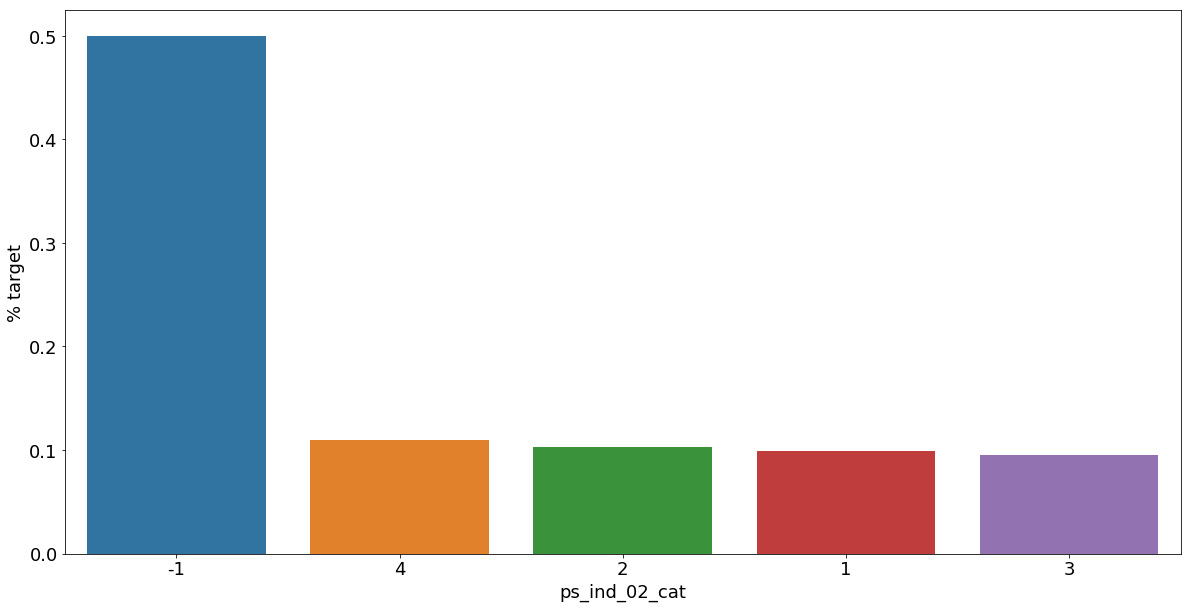

<Figure size 432x288 with 0 Axes>

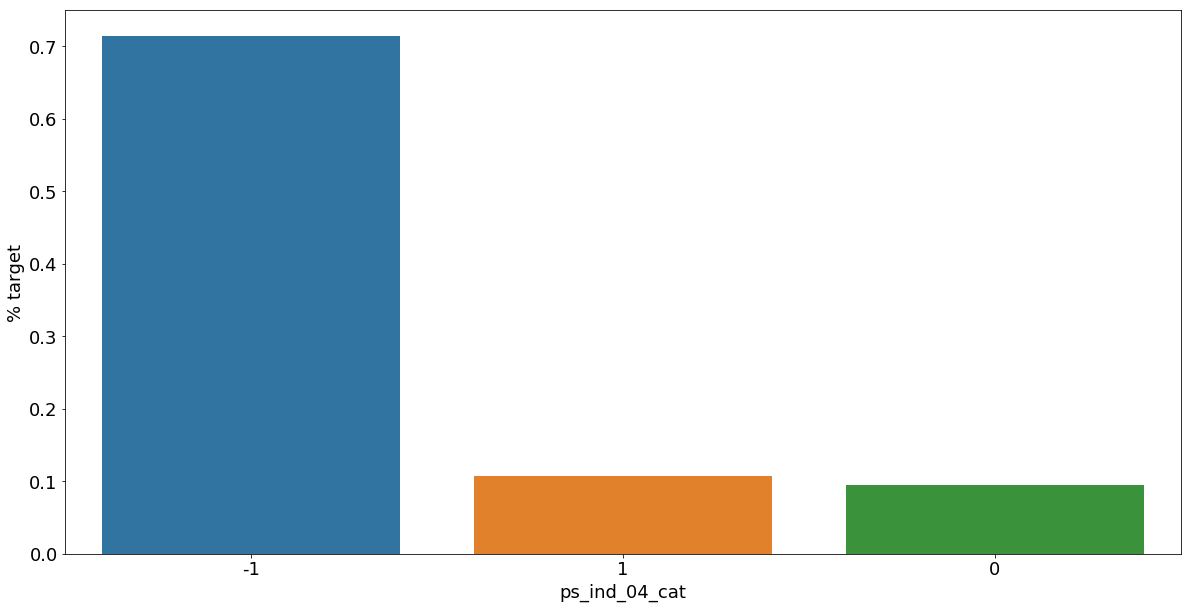

<Figure size 432x288 with 0 Axes>

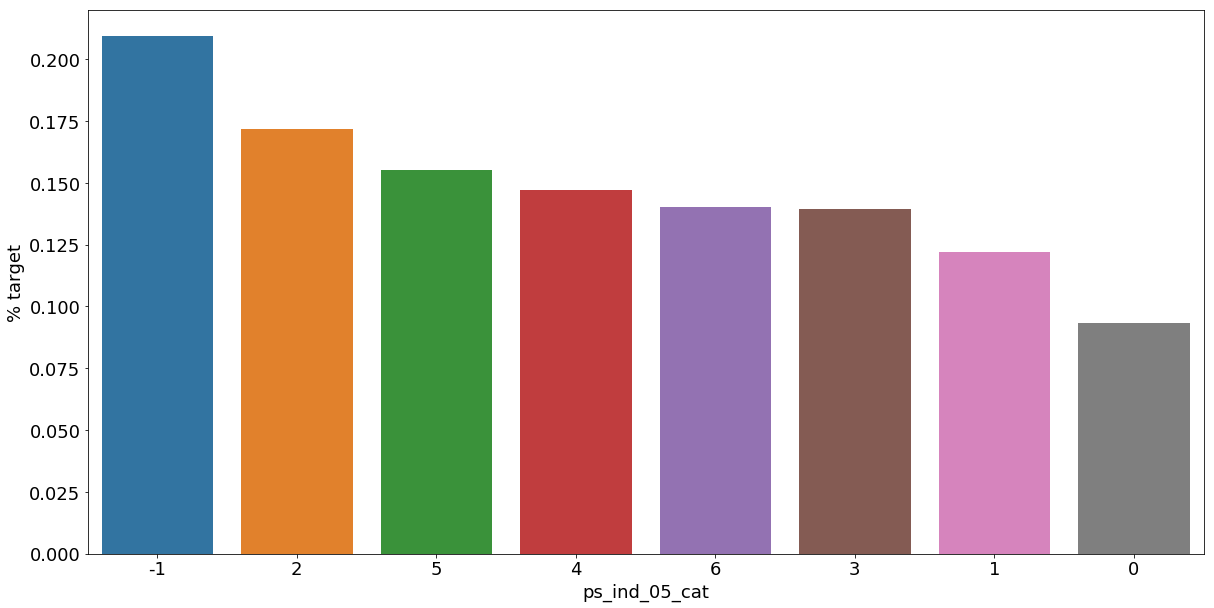

<Figure size 432x288 with 0 Axes>

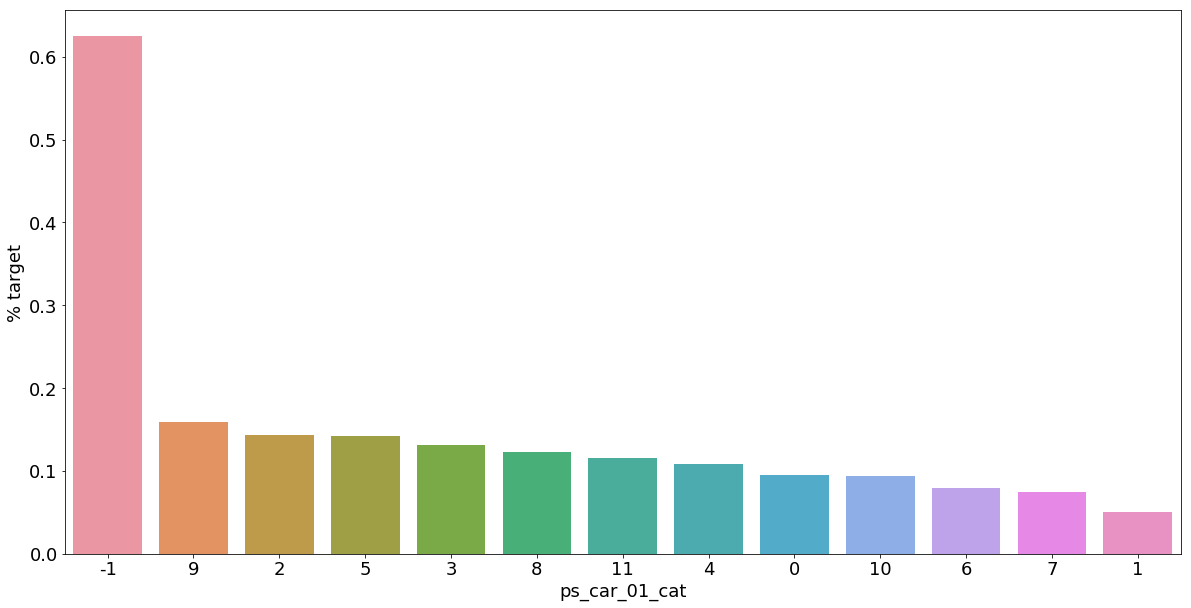

<Figure size 432x288 with 0 Axes>

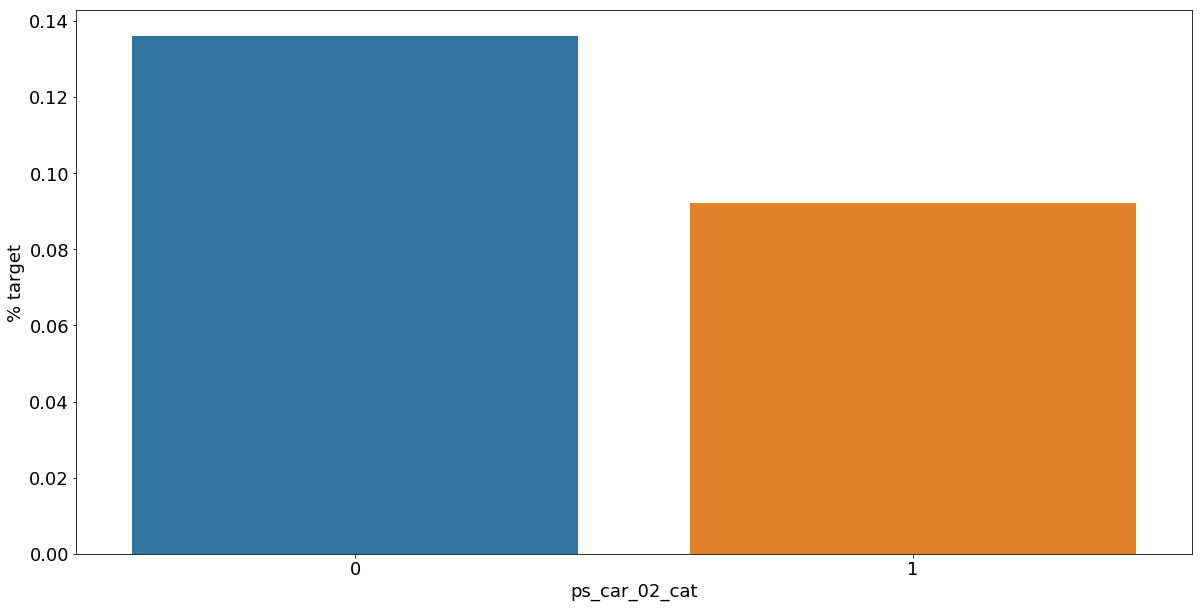

<Figure size 432x288 with 0 Axes>

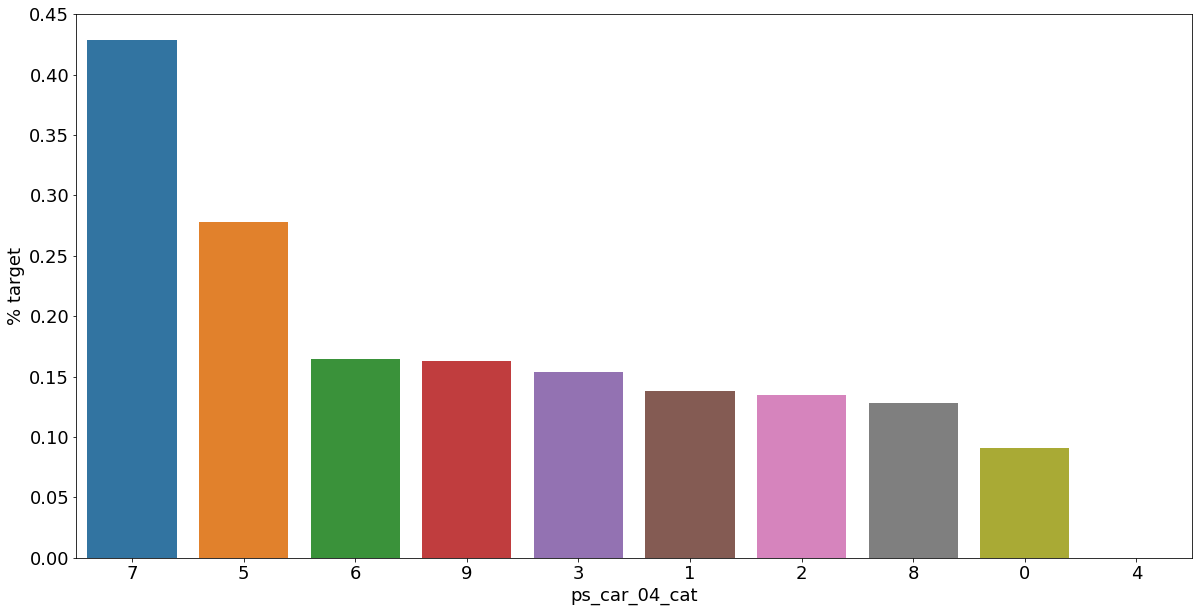

<Figure size 432x288 with 0 Axes>

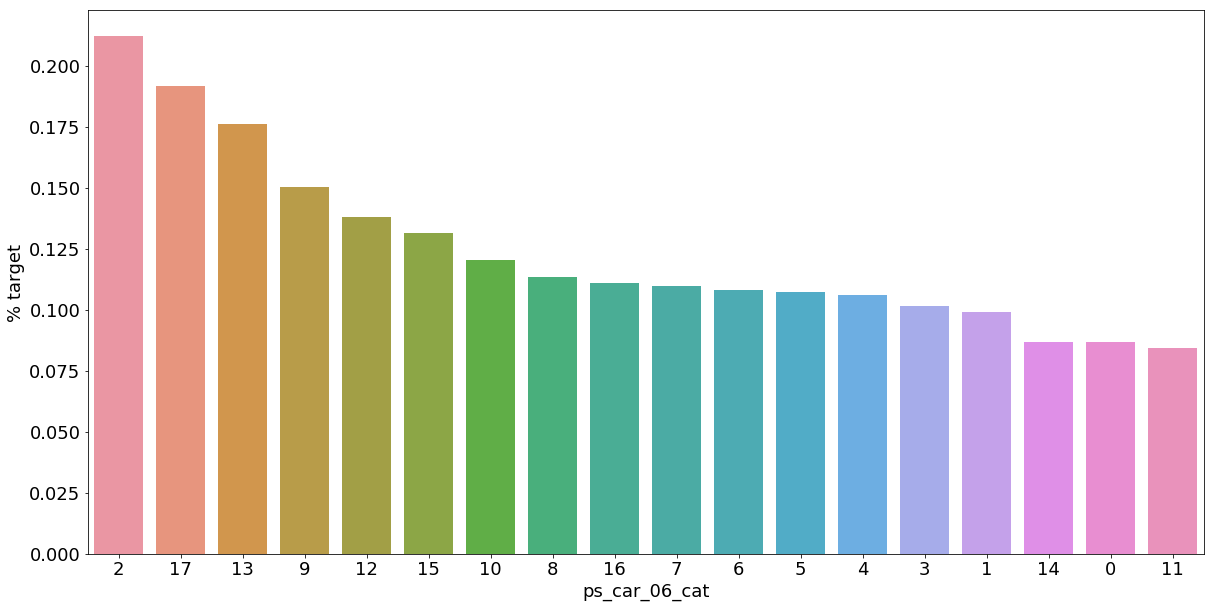

<Figure size 432x288 with 0 Axes>

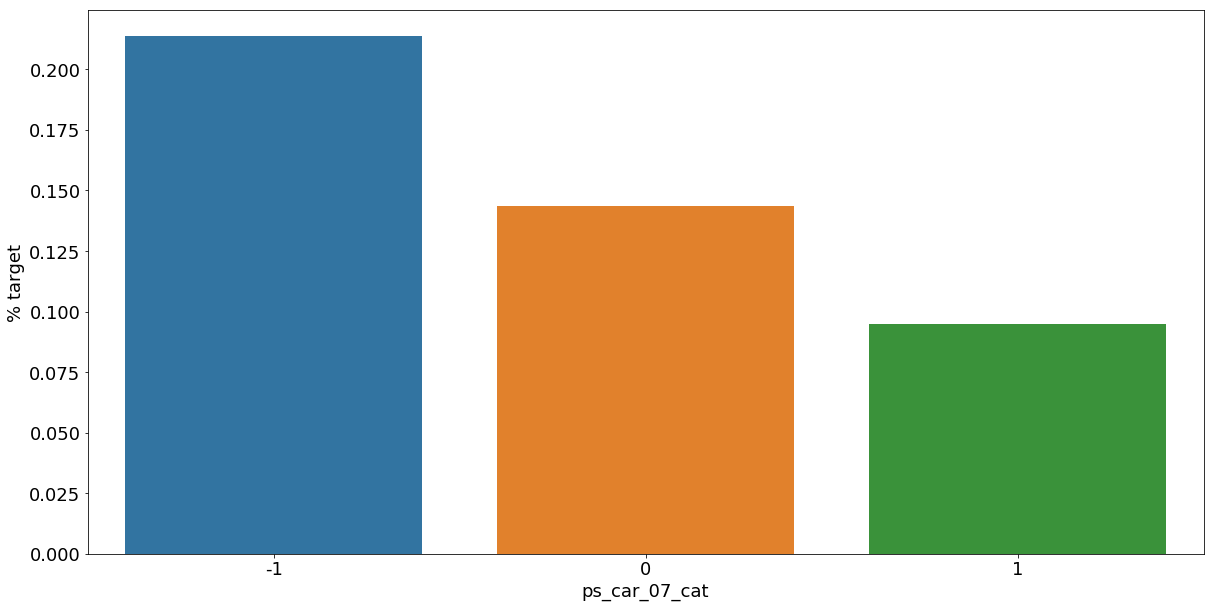

<Figure size 432x288 with 0 Axes>

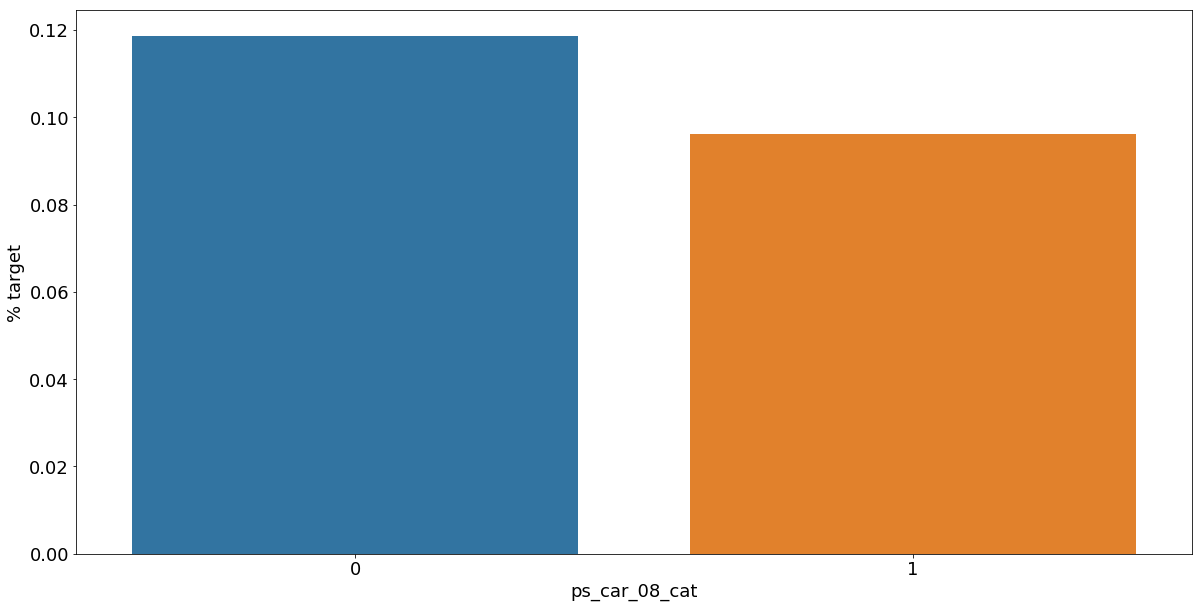

<Figure size 432x288 with 0 Axes>

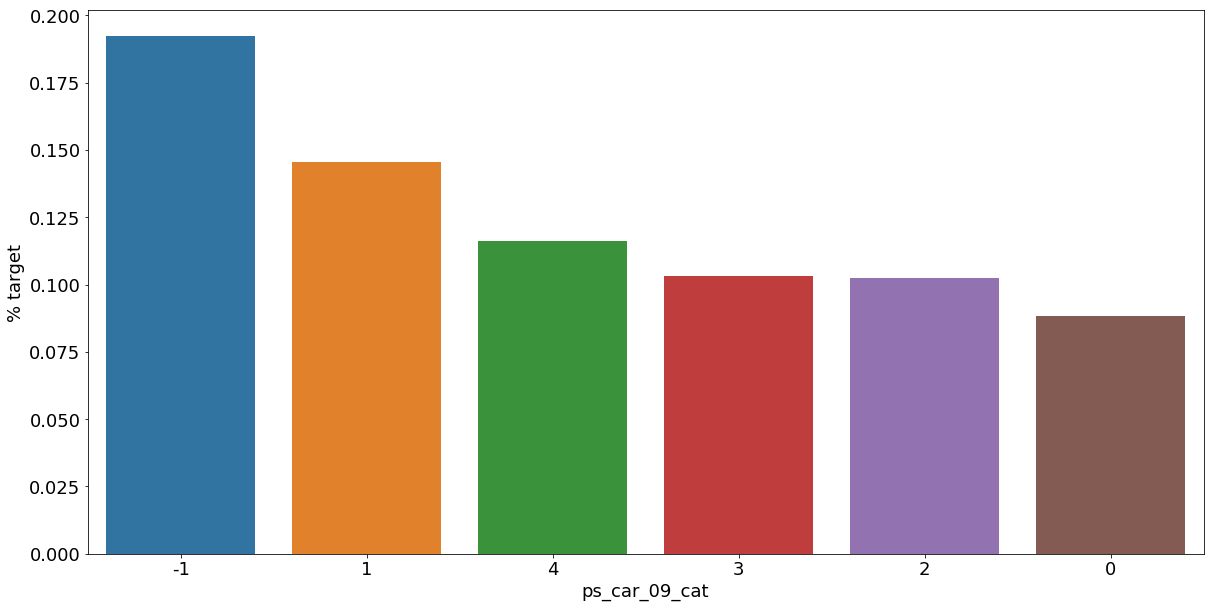

<Figure size 432x288 with 0 Axes>

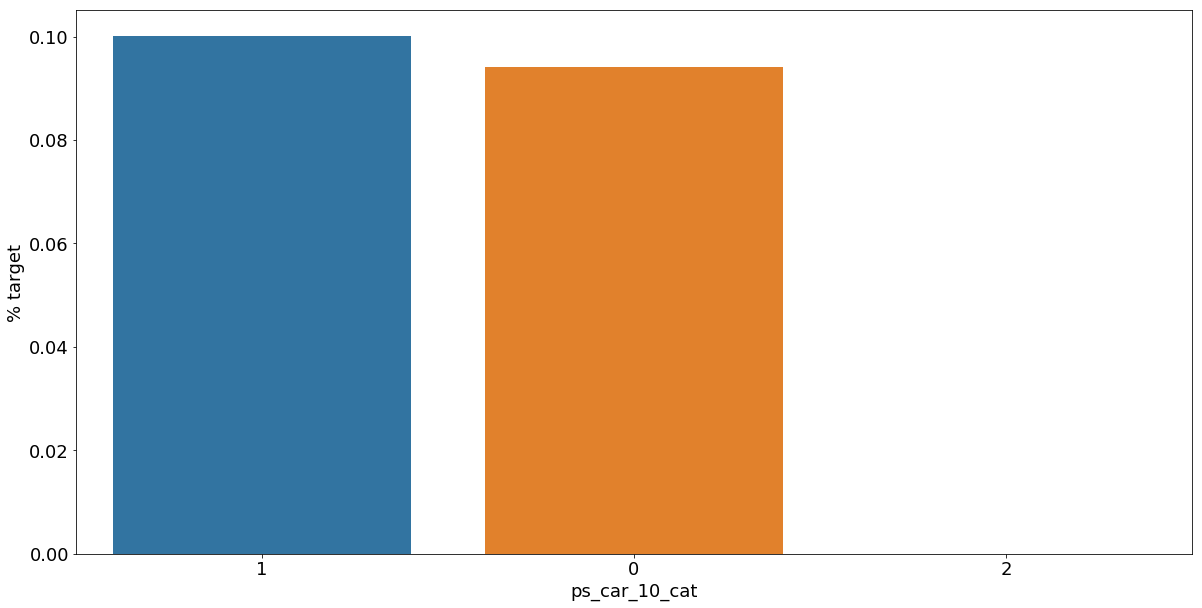

In [52]:
v = meta[(meta.level == 'normal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    
    # Bar plot
    # Order the bars descending on tartget mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()

=============

In [53]:
meta[meta.level=='normal'].head()

,role,level,keep,dtype
varname,,,,
id,id,normal,False,int64
ps_ind_02_cat,input,normal,True,int64
ps_ind_04_cat,input,normal,True,int64
ps_ind_05_cat,input,normal,True,int64
ps_car_01_cat,input,normal,True,int64


In [54]:
meta.keep[meta.keep==True].head()

varname
target           True
ps_ind_01        True
ps_ind_02_cat    True
ps_ind_03        True
ps_ind_04_cat    True
Name: keep, dtype: bool

In [55]:
v = meta[(meta.level=='normal') & (meta.keep)].index
v

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat'],
      dtype='object', name='varname')

In [56]:
cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
cat_perc.head()

,ps_car_10_cat,target
0,0,0.094118
1,1,0.100082
2,2,0.000000


In [57]:
cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
cat_perc.head()

,ps_car_10_cat,target
0,0,0.094118
1,1,0.100082
2,2,0.000000


In [58]:
cat_perc.sort_values(by='target', ascending=False, inplace=True)
cat_perc

,ps_car_10_cat,target
1,1,0.100082
0,0,0.094118
2,2,0.000000


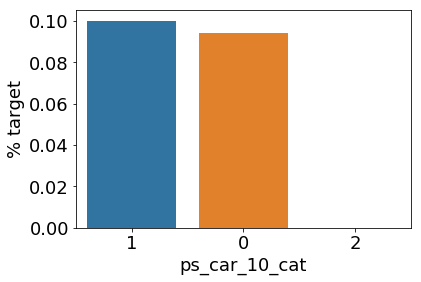

In [59]:
sns.barplot(x=f, y='target', data=cat_perc, order=cat_perc[f])
plt.ylabel('% target', fontsize=18)
plt.xlabel(f, fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [60]:
# 이번에는 총 개수를 본다.
cat_perc = train[[f, 'target']].groupby([f],as_index=False).agg(['mean','count'])
# cat_perc.sort_values(by='target', ascending=False, inplace=True)

As we can see from the variables **with missing values**, it is a good idea to keep the missing values as a separate category value, instead of replacing them by the mode for instance. The customers with a missing value appear to have a much higher (in some cases much lower) probability to ask for an insurance claim.


## 6-2. Interval variables

Checking the correlations between interval variables. A heatmap is a good way to visualize the correlation between variables. The code below is based on an example by micheal Waskom.

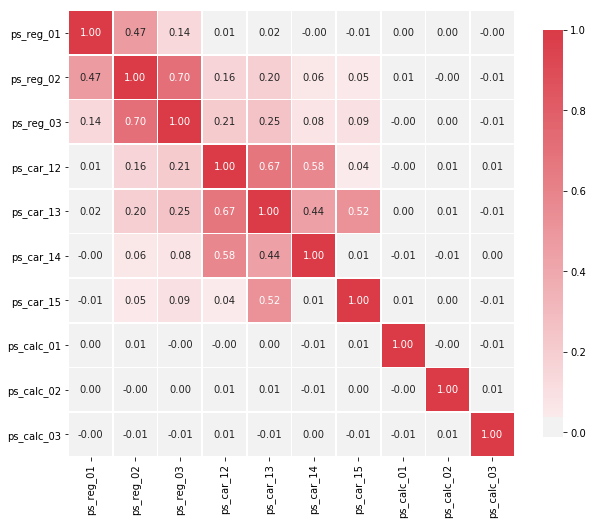

In [61]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
               square=True, linewidths=.5, annot=True, cbar_kws={'shrink':.75})
    plt.show();

v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

==========

In [62]:
v

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object', name='varname')

In [63]:
correlations = train[v].corr()
correlations

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
ps_reg_01,1.000000,0.473811,0.140792,0.008557,0.019603,-0.003519,-0.005385,0.000455,0.004419,-0.003501
ps_reg_02,0.473811,1.000000,0.704005,0.164076,0.195833,0.056116,0.049006,0.008740,-0.002224,-0.008929
ps_reg_03,0.140792,0.704005,1.000000,0.209704,0.254470,0.076584,0.088690,-0.001379,0.003412,-0.012044
ps_car_12,0.008557,0.164076,0.209704,1.000000,0.674926,0.580525,0.042926,-0.000971,0.006013,0.008347
ps_car_13,0.019603,0.195833,0.254470,0.674926,1.000000,0.444529,0.517949,0.003818,0.010800,-0.009702
ps_car_14,-0.003519,0.056116,0.076584,0.580525,0.444529,1.000000,0.012854,-0.006153,-0.008535,0.002151
ps_car_15,-0.005385,0.049006,0.088690,0.042926,0.517949,0.012854,1.000000,0.008500,0.003283,-0.009647
ps_calc_01,0.000455,0.008740,-0.001379,-0.000971,0.003818,-0.006153,0.008500,1.000000,-0.000890,-0.008230
ps_calc_02,0.004419,-0.002224,0.003412,0.006013,0.010800,-0.008535,0.003283,-0.000890,1.000000,0.006062
ps_calc_03,-0.003501,-0.008929,-0.012044,0.008347,-0.009702,0.002151,-0.009647,-0.008230,0.006062,1.000000


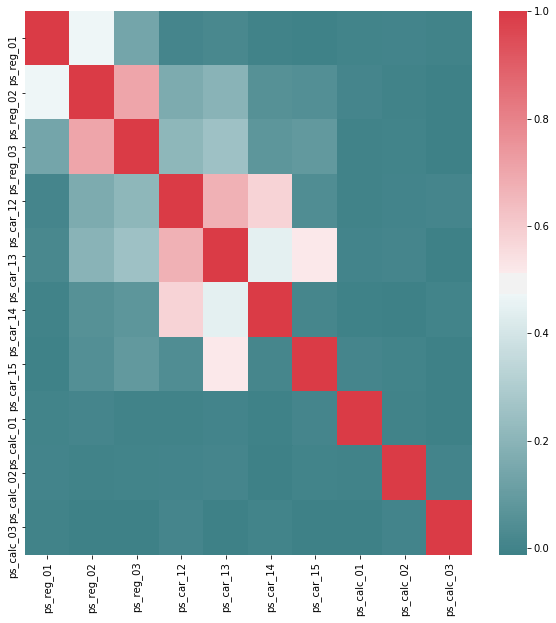

In [64]:
cmap = sns.diverging_palette(202, 10, as_cmap=True)
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, cmap=cmap)

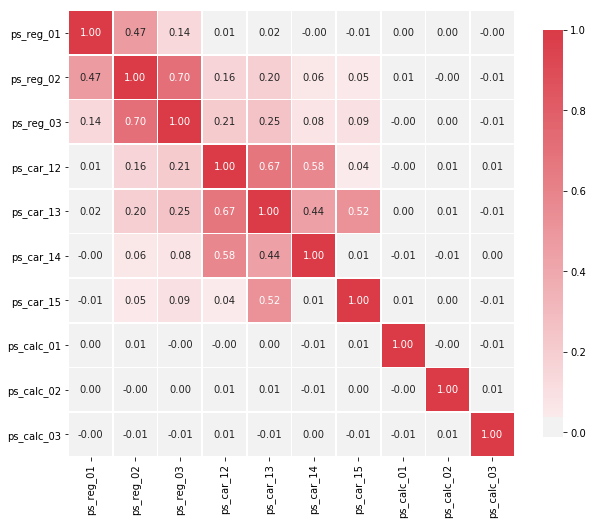

In [65]:
cmap = sns.diverging_palette(202, 10, as_cmap=True)
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
           square=True, linewidths=.5, annot=True, cbar_kws={'shrink':.75} )
plt.show()

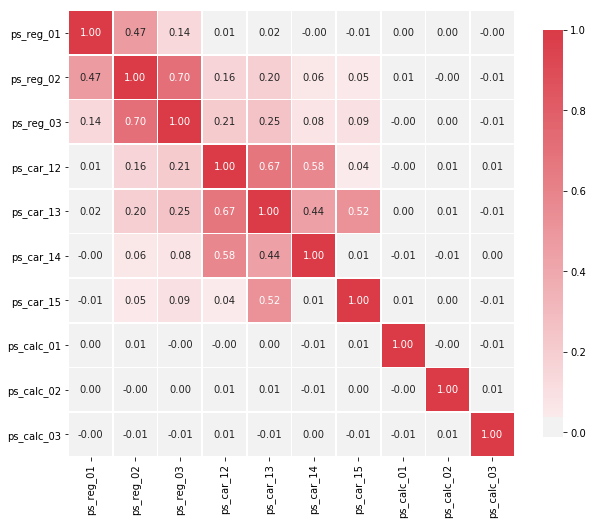

In [66]:
v = meta[(meta.level=='interval')&(meta.keep)].index
corr_heatmap(v)

==========

There are a string correlations between the variables:
- ps_reg_02 and ps_reg_03 (0.7)
- ps_car_12 and ps_car_13(0.67)
- ps_car_12 and ps_car_14(0.58)
- ps_car_13 and ps_car_15(0.67)

Seaborn has some handy to visualize the (linear) relationship between variables. We could user a pairplot to visualize the relationship between the variables. But because the heatmap already showed the limited number of correlated variables, we'll look at each of the highly correlated variables separately. 
- **NOTE** : I take a sample of the train data to speed up the process.


In [67]:
# Only 10% of smaple are taken
s = train.sample(frac=0.1)
print(s.shape)
s.head()

(2226, 58)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te
2709,1350492,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,1.1,0.859506,11,1,0,11,1,1,2,1,44,3.0,0.447214,0.740909,0.406202,2.828427,0.1,0.5,0.9,2,3,7,3,9,1,5,7,0,5,4,1,1,0,0,0,0,0.053042
8952,921982,0,3,1,7,0,0,1,0,0,0,0,0,0,0,0,8,0,1,0,0.3,0.1,0.897248,7,1,0,11,1,1,2,1,19,3.0,0.316228,0.619751,0.388716,2.828427,0.7,0.5,0.8,2,1,7,0,11,3,9,4,1,4,13,0,1,1,1,0,0,0.094318
1438,1441111,0,0,2,2,1,0,1,0,0,0,0,0,0,0,0,11,1,0,0,0.4,0.5,0.641775,8,1,0,1,1,1,0,1,38,2.0,0.316228,0.715848,0.359861,3.464102,0.1,0.9,0.0,2,2,10,1,6,5,8,5,1,2,13,0,0,0,0,0,1,0.078938
420,651089,0,2,1,7,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.687841,7,1,0,14,0,1,2,1,82,3.0,0.316228,0.598276,0.368511,2.645751,0.6,0.6,0.8,1,2,8,1,11,5,4,3,5,2,5,0,1,1,0,0,0,0.112039
17053,259620,0,4,1,10,1,0,0,1,0,0,0,0,0,0,0,8,0,1,0,0.7,0.8,0.954267,11,0,0,3,1,0,2,1,15,3.0,0.424264,1.051838,0.345398,3.741657,0.8,0.8,0.7,2,2,9,1,5,2,14,2,4,3,7,0,0,0,1,1,0,0.117654


#### ps_reg_02 and ps_reg_03

As the regression line shows, there is a linear relationship between these variables. Thanks to the hue parameter we can see that the regression lines for target=0 and target=1 are the same.

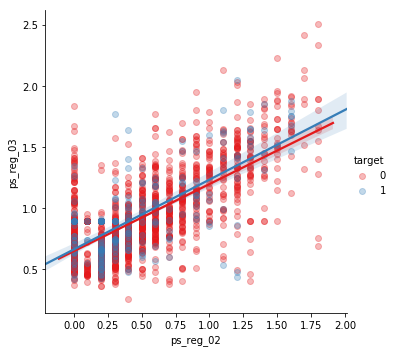

In [68]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_12 and ps_car_13

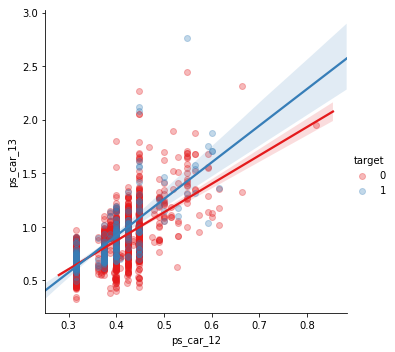

In [69]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_12 and ps_car_14

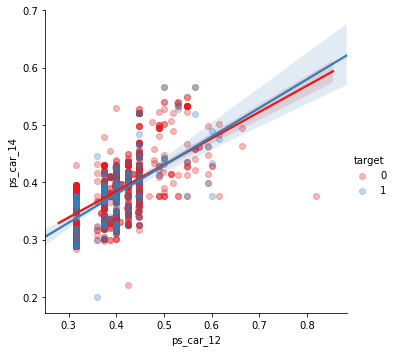

In [70]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_13 and ps_car_15

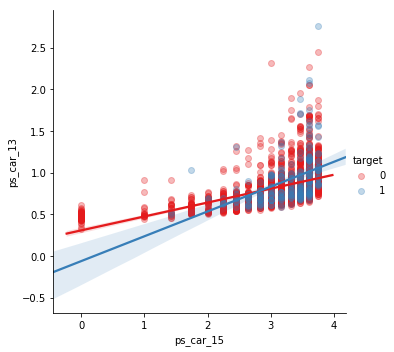

In [71]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

Alright, so now what? How can we decide which of the correlated variables to keep? We could perform Principal Component Analysis(PCA) on the variables to reduce the dimensions. In the AllState Claims Severity Competition I made [this kernel](https://www.kaggle.com/bertcarremans/reducing-number-of-numerical-features-with-pca) to da that. But as the number of correlated variables is rather low, we will let the model do the heavy-lifting.

> 좋아, 그럼 이제 어쩌지? 어떤 상관 변수를 유지할 것인지 어떻게 결정할 수 있는가? 우리는 차원을 줄이기 위해 변수에 대한 주요 성분 분석을 수행할 수 있다. 올스테이트 클레임스 경연에서 나는 그것을 하기 위해 이 커널을 만들었다. 그러나 상관 변수의 수가 다소 적기 때문에, 우리는 모델에게 중도를 하게 할 것이다.

## 6-3. Checkiong the correlations between ordinal variables

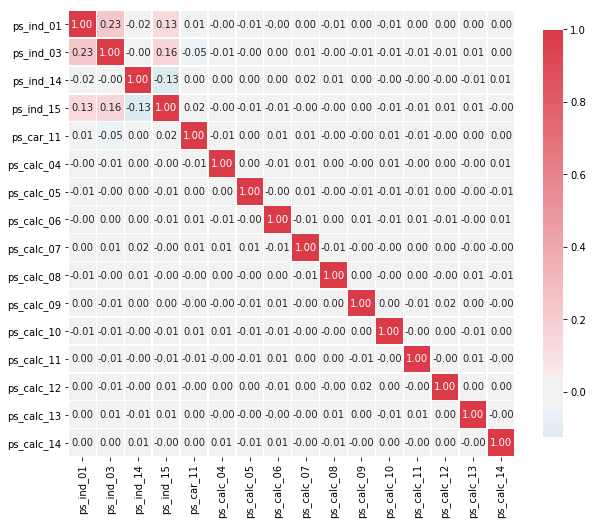

In [72]:
v = meta[(meta.level=='ordinal')&(meta.keep)].index
corr_heatmap(v)

For the ordinal variables we do not see many correlations. We could, on the other hand, look at how the distributions are when grouping by the target value.

<a class='anchor' id='feat_engineering'></a>

# 7. Feature engineering

## 7-1. Creating dummy variables 

The values of the categorical Variables do not represent any order or magnitude, For instance, category 2 in not twice the value of category 1. Therefore we can create dummy variables to deal with that. We drop the first dummy variables as this information can be derived from the other dummy variables generated for the categories of the original variable.

- 카테고리(범주)형 변수는 순서나 크기가 없다. 카테고리2는 카테고리1의 2배가 아니다.
- 카테고리 변수 처리를 위해 더미 데이터를 만든다.

In [75]:
print(meta.shape)
meta[meta.level == 'normal'].reset_index()

(59, 4)


,varname,role,level,keep,dtype
0,id,id,normal,False,int64
1,ps_ind_02_cat,input,normal,True,int64
2,ps_ind_04_cat,input,normal,True,int64
3,ps_ind_05_cat,input,normal,True,int64
4,ps_car_01_cat,input,normal,True,int64
5,ps_car_02_cat,input,normal,True,int64
6,ps_car_03_cat,input,normal,False,int64
7,ps_car_04_cat,input,normal,True,int64
8,ps_car_05_cat,input,normal,False,int64
9,ps_car_06_cat,input,normal,True,int64


In [76]:
print(train.shape)
train.head()

(22260, 58)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te
0,459642,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.8,0.2,0.511737,7,1,8,11,1,0,2,1,71,2.0,0.489898,1.326097,0.412553,3.741657,0.0,0.9,0.5,4,1,8,3,12,2,14,6,4,4,7,0,0,0,0,0,0,0.104143
1,1262798,0,0,1,4,1,4,1,0,0,0,0,0,0,0,0,1,0,1,0,0.9,0.4,0.800391,11,0,0,9,1,0,2,1,93,3.0,0.400000,1.007882,0.383406,3.605551,0.5,0.8,0.3,3,1,8,3,10,3,7,5,0,5,2,1,1,1,1,1,0,0.078014
2,863342,0,5,2,1,1,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.9,1.4,1.210372,11,0,0,10,1,1,2,1,28,3.0,0.387298,0.757988,0.378153,2.645751,0.4,0.6,0.4,2,1,7,4,10,2,3,6,2,2,6,1,0,0,0,0,0,0.098839
3,563177,0,6,2,5,1,0,0,1,0,0,0,0,0,0,0,5,1,0,0,0.2,0.3,0.897248,6,1,0,0,1,1,0,1,22,3.0,0.316228,0.811590,0.374566,3.741657,0.1,0.0,0.6,2,3,8,1,10,2,3,5,3,1,9,0,1,1,0,0,1,0.098893
4,454574,0,2,1,3,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.4,0.772172,7,1,2,1,0,1,2,1,90,0.0,0.374166,0.627141,0.416653,2.645751,0.0,0.8,0.2,2,2,10,5,8,3,7,5,2,1,10,0,1,1,0,0,0,0.075436


In [77]:
v = meta[(meta.level == 'normal') & (meta.keep)].index
print("v:", v)
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

v: Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat'],
      dtype='object', name='varname')
Before dummification we have 58 variables in train
After dummification we have 109 variables in train


In [78]:
# 칼럼수가 57개에서 108개로 늘어난 것을 볼 수 있다.
# 각 카테고리의 종류별로 추가됨.
# ps_ind_02_cat_1, ps_ind_02_cat_2 식으로 추가됨
train.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,...,ps_ind_05_cat_6,ps_car_01_cat_0,ps_car_01_cat_1,ps_car_01_cat_2,ps_car_01_cat_3,ps_car_01_cat_4,ps_car_01_cat_5,ps_car_01_cat_6,ps_car_01_cat_7,ps_car_01_cat_8,ps_car_01_cat_9,ps_car_01_cat_10,ps_car_01_cat_11,ps_car_02_cat_1,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_06_cat_1,ps_car_06_cat_2,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_5,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_8,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_12,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_07_cat_0,ps_car_07_cat_1,ps_car_08_cat_1,ps_car_09_cat_0,ps_car_09_cat_1,ps_car_09_cat_2,ps_car_09_cat_3,ps_car_09_cat_4,ps_car_10_cat_1,ps_car_10_cat_2
0,459642,0,0,1,0,1,0,0,0,0,0,0,0,8,1,0,0,0.8,0.2,0.511737,71,2.0,0.489898,1.326097,0.412553,3.741657,0.0,0.9,0.5,4,1,8,3,12,2,14,6,4,4,7,0,0,0,0,0,0,0.104143,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,1262798,0,0,4,1,0,0,0,0,0,0,0,0,1,0,1,0,0.9,0.4,0.800391,93,3.0,0.400000,1.007882,0.383406,3.605551,0.5,0.8,0.3,3,1,8,3,10,3,7,5,0,5,2,1,1,1,1,1,0,0.078014,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,863342,0,5,1,0,1,0,0,0,0,0,0,0,8,1,0,0,0.9,1.4,1.210372,28,3.0,0.387298,0.757988,0.378153,2.645751,0.4,0.6,0.4,2,1,7,4,10,2,3,6,2,2,6,1,0,0,0,0,0,0.098839,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0
3,563177,0,6,5,0,1,0,0,0,0,0,0,0,5,1,0,0,0.2,0.3,0.897248,22,3.0,0.316228,0.811590,0.374566,3.741657,0.1,0.0,0.6,2,3,8,1,10,2,3,5,3,1,9,0,1,1,0,0,1,0.098893,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0
4,454574,0,2,3,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.4,0.772172,90,0.0,0.374166,0.627141,0.416653,2.645751,0.0,0.8,0.2,2,2,10,5,8,3,7,5,2,1,10,0,1,1,0,0,0,0.075436,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0


So, creating dummy variables adds 52 variables to the training set.

- 캐글은 카테고리를 얼마나 잘 분류했느냐가 아니라 얼마나 정확히 예측하였는냐가 중요.

<a class='anchor' id='feat_selection'></a>

## 7-2. Creating interaction variables

In [79]:
v = meta[(meta.level=='interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)  # Remove the original columns

print('Before creating interactions we habe {} variables in train'.format(train.shape[1]))

train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we habe 109 variables in train
After creating interactions we have 164 variables in train


This adds extra interaction variables to the train data. Thanks to the *get_feature_names* method we can assign column names to these new variables.

======

위 함수를 풀어보자

In [111]:
v = meta[(meta.level=='interval') & (meta.keep)].index
v

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object', name='varname')

In [112]:
# degree=2 는 제곱
# interaction_only=False는 교집합도 포함한다는 의미
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

In [113]:
poly.fit_transform(train[v])

array([[0.8       , 0.2       , 0.51173724, ..., 0.81      , 0.45      ,
        0.25      ],
       [0.9       , 0.4       , 0.80039053, ..., 0.64      , 0.24      ,
        0.09      ],
       [0.9       , 1.4       , 1.21037184, ..., 0.36      , 0.24      ,
        0.16      ],
       ...,
       [0.8       , 0.3       , 0.82613558, ..., 0.04      , 0.14      ,
        0.49      ],
       [0.        , 1.4       , 1.5833114 , ..., 0.25      , 0.1       ,
        0.04      ],
       [0.9       , 0.5       , 0.91172913, ..., 0.01      , 0.09      ,
        0.81      ]])

In [116]:
poly.get_feature_names(v)[:3]

['ps_reg_01', 'ps_reg_02', 'ps_reg_03']

In [117]:
# 교집합 데이터 프레임을 제작
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
print(interactions.shape)
interactions.head()

(22260, 65)


,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,0.8,0.2,0.511737,0.489898,1.326097,0.412553,3.741657,0.0,0.9,0.5,0.64,0.16,0.409390,0.391918,1.060878,0.330042,2.993326,0.00,0.72,0.40,0.04,0.102347,0.097980,0.265219,0.082511,0.748331,0.00,0.18,0.10,0.261875,0.250699,0.678613,0.211119,1.914745,0.000000,0.460564,0.255869,0.24,0.649652,0.202109,1.833030,0.000000,0.440908,0.244949,1.758533,0.547085,4.961800,0.000000,1.193487,0.663048,0.1702,1.543632,0.000000,0.371298,0.206277,14.0,0.000000,3.367492,1.870829,0.00,0.00,0.00,0.81,0.45,0.25
1,0.9,0.4,0.800391,0.400000,1.007882,0.383406,3.605551,0.5,0.8,0.3,0.81,0.36,0.720351,0.360000,0.907094,0.345065,3.244996,0.45,0.72,0.27,0.16,0.320156,0.160000,0.403153,0.153362,1.442221,0.20,0.32,0.12,0.640625,0.320156,0.806699,0.306874,2.885849,0.400195,0.640312,0.240117,0.16,0.403153,0.153362,1.442221,0.200000,0.320000,0.120000,1.015826,0.386428,3.633971,0.503941,0.806306,0.302365,0.1470,1.382389,0.191703,0.306725,0.115022,13.0,1.802776,2.884441,1.081665,0.25,0.40,0.15,0.64,0.24,0.09
2,0.9,1.4,1.210372,0.387298,0.757988,0.378153,2.645751,0.4,0.6,0.4,0.81,1.26,1.089335,0.348569,0.682189,0.340338,2.381176,0.36,0.54,0.36,1.96,1.694521,0.542218,1.061183,0.529415,3.704052,0.56,0.84,0.56,1.465000,0.468775,0.917447,0.457706,3.202343,0.484149,0.726223,0.484149,0.15,0.293567,0.146458,1.024695,0.154919,0.232379,0.154919,0.574545,0.286636,2.005447,0.303195,0.454793,0.303195,0.1430,1.000500,0.151261,0.226892,0.151261,7.0,1.058301,1.587451,1.058301,0.16,0.24,0.16,0.36,0.24,0.16
3,0.2,0.3,0.897248,0.316228,0.811590,0.374566,3.741657,0.1,0.0,0.6,0.04,0.06,0.179450,0.063246,0.162318,0.074913,0.748331,0.02,0.00,0.12,0.09,0.269174,0.094868,0.243477,0.112370,1.122497,0.03,0.00,0.18,0.805054,0.283735,0.728197,0.336079,3.357195,0.089725,0.000000,0.538349,0.10,0.256647,0.118448,1.183216,0.031623,0.000000,0.189737,0.658678,0.303994,3.036690,0.081159,0.000000,0.486954,0.1403,1.401499,0.037457,0.000000,0.224740,14.0,0.374166,0.000000,2.244994,0.01,0.00,0.06,0.00,0.00,0.36
4,0.9,0.4,0.772172,0.374166,0.627141,0.416653,2.645751,0.0,0.8,0.2,0.81,0.36,0.694955,0.336749,0.564427,0.374988,2.381176,0.00,0.72,0.18,0.16,0.308869,0.149666,0.250856,0.166661,1.058301,0.00,0.32,0.08,0.596250,0.288920,0.484261,0.321728,2.042976,0.000000,0.617738,0.154434,0.14,0.234655,0.155897,0.989949,0.000000,0.299333,0.074833,0.393306,0.261300,1.659259,0.000000,0.501713,0.125428,0.1736,1.102361,0.000000,0.333323,0.083331,7.0,0.000000,2.116601,0.529150,0.00,0.00,0.00,0.64,0.16,0.04


In [118]:
# 기존에 있던 칼럼은 제거 한다.
# 65개에서 10개가 줄어 55개가 되었다.
interactions.drop(v, axis=1, inplace=True)
print(interactions.shape)
interactions.head()

(22260, 55)


,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,0.64,0.16,0.409390,0.391918,1.060878,0.330042,2.993326,0.00,0.72,0.40,0.04,0.102347,0.097980,0.265219,0.082511,0.748331,0.00,0.18,0.10,0.261875,0.250699,0.678613,0.211119,1.914745,0.000000,0.460564,0.255869,0.24,0.649652,0.202109,1.833030,0.000000,0.440908,0.244949,1.758533,0.547085,4.961800,0.000000,1.193487,0.663048,0.1702,1.543632,0.000000,0.371298,0.206277,14.0,0.000000,3.367492,1.870829,0.00,0.00,0.00,0.81,0.45,0.25
1,0.81,0.36,0.720351,0.360000,0.907094,0.345065,3.244996,0.45,0.72,0.27,0.16,0.320156,0.160000,0.403153,0.153362,1.442221,0.20,0.32,0.12,0.640625,0.320156,0.806699,0.306874,2.885849,0.400195,0.640312,0.240117,0.16,0.403153,0.153362,1.442221,0.200000,0.320000,0.120000,1.015826,0.386428,3.633971,0.503941,0.806306,0.302365,0.1470,1.382389,0.191703,0.306725,0.115022,13.0,1.802776,2.884441,1.081665,0.25,0.40,0.15,0.64,0.24,0.09
2,0.81,1.26,1.089335,0.348569,0.682189,0.340338,2.381176,0.36,0.54,0.36,1.96,1.694521,0.542218,1.061183,0.529415,3.704052,0.56,0.84,0.56,1.465000,0.468775,0.917447,0.457706,3.202343,0.484149,0.726223,0.484149,0.15,0.293567,0.146458,1.024695,0.154919,0.232379,0.154919,0.574545,0.286636,2.005447,0.303195,0.454793,0.303195,0.1430,1.000500,0.151261,0.226892,0.151261,7.0,1.058301,1.587451,1.058301,0.16,0.24,0.16,0.36,0.24,0.16
3,0.04,0.06,0.179450,0.063246,0.162318,0.074913,0.748331,0.02,0.00,0.12,0.09,0.269174,0.094868,0.243477,0.112370,1.122497,0.03,0.00,0.18,0.805054,0.283735,0.728197,0.336079,3.357195,0.089725,0.000000,0.538349,0.10,0.256647,0.118448,1.183216,0.031623,0.000000,0.189737,0.658678,0.303994,3.036690,0.081159,0.000000,0.486954,0.1403,1.401499,0.037457,0.000000,0.224740,14.0,0.374166,0.000000,2.244994,0.01,0.00,0.06,0.00,0.00,0.36
4,0.81,0.36,0.694955,0.336749,0.564427,0.374988,2.381176,0.00,0.72,0.18,0.16,0.308869,0.149666,0.250856,0.166661,1.058301,0.00,0.32,0.08,0.596250,0.288920,0.484261,0.321728,2.042976,0.000000,0.617738,0.154434,0.14,0.234655,0.155897,0.989949,0.000000,0.299333,0.074833,0.393306,0.261300,1.659259,0.000000,0.501713,0.125428,0.1736,1.102361,0.000000,0.333323,0.083331,7.0,0.000000,2.116601,0.529150,0.00,0.00,0.00,0.64,0.16,0.04


In [120]:
# 교집합을 기존 train에 합쳐준다.
train = pd.concat([train, interactions], axis=1)
print(train.shape)
train.head()

(22260, 274)


,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,...,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,459642,0,0,1,0,1,0,0,0,0,0,0,0,8,1,0,0,0.8,0.2,0.511737,71,2.0,0.489898,1.326097,0.412553,3.741657,0.0,0.9,0.5,4,1,8,3,12,2,14,6,4,4,7,0,0,0,0,0,0,0.104143,0,1,0,...,0.330042,2.993326,0.00,0.72,0.40,0.04,0.102347,0.097980,0.265219,0.082511,0.748331,0.00,0.18,0.10,0.261875,0.250699,0.678613,0.211119,1.914745,0.000000,0.460564,0.255869,0.24,0.649652,0.202109,1.833030,0.000000,0.440908,0.244949,1.758533,0.547085,4.961800,0.000000,1.193487,0.663048,0.1702,1.543632,0.000000,0.371298,0.206277,14.0,0.000000,3.367492,1.870829,0.00,0.00,0.00,0.81,0.45,0.25
1,1262798,0,0,4,1,0,0,0,0,0,0,0,0,1,0,1,0,0.9,0.4,0.800391,93,3.0,0.400000,1.007882,0.383406,3.605551,0.5,0.8,0.3,3,1,8,3,10,3,7,5,0,5,2,1,1,1,1,1,0,0.078014,1,0,0,...,0.345065,3.244996,0.45,0.72,0.27,0.16,0.320156,0.160000,0.403153,0.153362,1.442221,0.20,0.32,0.12,0.640625,0.320156,0.806699,0.306874,2.885849,0.400195,0.640312,0.240117,0.16,0.403153,0.153362,1.442221,0.200000,0.320000,0.120000,1.015826,0.386428,3.633971,0.503941,0.806306,0.302365,0.1470,1.382389,0.191703,0.306725,0.115022,13.0,1.802776,2.884441,1.081665,0.25,0.40,0.15,0.64,0.24,0.09
2,863342,0,5,1,0,1,0,0,0,0,0,0,0,8,1,0,0,0.9,1.4,1.210372,28,3.0,0.387298,0.757988,0.378153,2.645751,0.4,0.6,0.4,2,1,7,4,10,2,3,6,2,2,6,1,0,0,0,0,0,0.098839,0,1,0,...,0.340338,2.381176,0.36,0.54,0.36,1.96,1.694521,0.542218,1.061183,0.529415,3.704052,0.56,0.84,0.56,1.465000,0.468775,0.917447,0.457706,3.202343,0.484149,0.726223,0.484149,0.15,0.293567,0.146458,1.024695,0.154919,0.232379,0.154919,0.574545,0.286636,2.005447,0.303195,0.454793,0.303195,0.1430,1.000500,0.151261,0.226892,0.151261,7.0,1.058301,1.587451,1.058301,0.16,0.24,0.16,0.36,0.24,0.16
3,563177,0,6,5,0,1,0,0,0,0,0,0,0,5,1,0,0,0.2,0.3,0.897248,22,3.0,0.316228,0.811590,0.374566,3.741657,0.1,0.0,0.6,2,3,8,1,10,2,3,5,3,1,9,0,1,1,0,0,1,0.098893,0,1,0,...,0.074913,0.748331,0.02,0.00,0.12,0.09,0.269174,0.094868,0.243477,0.112370,1.122497,0.03,0.00,0.18,0.805054,0.283735,0.728197,0.336079,3.357195,0.089725,0.000000,0.538349,0.10,0.256647,0.118448,1.183216,0.031623,0.000000,0.189737,0.658678,0.303994,3.036690,0.081159,0.000000,0.486954,0.1403,1.401499,0.037457,0.000000,0.224740,14.0,0.374166,0.000000,2.244994,0.01,0.00,0.06,0.00,0.00,0.36
4,454574,0,2,3,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.4,0.772172,90,0.0,0.374166,0.627141,0.416653,2.645751,0.0,0.8,0.2,2,2,10,5,8,3,7,5,2,1,10,0,1,1,0,0,0,0.075436,1,0,0,...,0.374988,2.381176,0.00,0.72,0.18,0.16,0.3

======

<a class="anchor" id="feat_selection"></a>
# 8. Feature Selection

## 8-1. Removing features with low or zero variance

Personally, I prefer to let the classifier algorithm chose which feature to keep. But there is one thing that we can do ourselves. That is removing features with no or a very low variance. Sklearn has a handy method to do that: **VarianceThreshold**. By default it removes features with zero variance. This will not be applicable for this competition as we saw there are no zero-variance variables in the previous steps. But if we would remove features with less than 1% variance, we would remove 31 variables.

- 영향이 제일 낮은 변수를 제거한다.
- 분산이 1% 미만인 것을 제거한다. (31개 변수가 제거됨)

In [121]:
id_target = 'id target'.split()
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(id_target, axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x: not x) # Function to toggle boolean array elements
v = train.drop(id_target, axis=1).columns[f(selector.get_support())]

print('{} variables have too low variance.'.format(len(v)))
print('These vartiables are {}'.format(list(v)))

33 variables have too low variance.
These vartiables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


==================

In [122]:
# 위 함수를 풀이해본다.
id_target

['id', 'target']

In [130]:
selector = VarianceThreshold(threshold=.01)

In [131]:
selector.fit(train.drop(id_target, axis=1))

VarianceThreshold(threshold=0.01)

In [135]:
# True는 threshold(.01)보다 크다는 것을 의미, False는 작다는 것을 의미한다.
selector.get_support()

array([ True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [136]:
# 위의 결과에서 True, False를 바꾸어준다.
# 우선 람다식으로 함수를 만들어준다.
f = np.vectorize(lambda x: not x) # Function to toggle boolean array elements
f

In [138]:
f(selector.get_support())

array([False, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [139]:
v = train.drop(id_target, axis=1).columns[f(selector.get_support())]

print('{} variables have too low variance.'.format(len(v)))
print('These vartiables are {}'.format(list(v)))

33 variables have too low variance.
These vartiables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


In [140]:
# 줄어든 train 데이터프레임 확인
print(train.shape)
train.head()

(22260, 274)


,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,...,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,459642,0,0,1,0,1,0,0,0,0,0,0,0,8,1,0,0,0.8,0.2,0.511737,71,2.0,0.489898,1.326097,0.412553,3.741657,0.0,0.9,0.5,4,1,8,3,12,2,14,6,4,4,7,0,0,0,0,0,0,0.104143,0,1,0,...,0.330042,2.993326,0.00,0.72,0.40,0.04,0.102347,0.097980,0.265219,0.082511,0.748331,0.00,0.18,0.10,0.261875,0.250699,0.678613,0.211119,1.914745,0.000000,0.460564,0.255869,0.24,0.649652,0.202109,1.833030,0.000000,0.440908,0.244949,1.758533,0.547085,4.961800,0.000000,1.193487,0.663048,0.1702,1.543632,0.000000,0.371298,0.206277,14.0,0.000000,3.367492,1.870829,0.00,0.00,0.00,0.81,0.45,0.25
1,1262798,0,0,4,1,0,0,0,0,0,0,0,0,1,0,1,0,0.9,0.4,0.800391,93,3.0,0.400000,1.007882,0.383406,3.605551,0.5,0.8,0.3,3,1,8,3,10,3,7,5,0,5,2,1,1,1,1,1,0,0.078014,1,0,0,...,0.345065,3.244996,0.45,0.72,0.27,0.16,0.320156,0.160000,0.403153,0.153362,1.442221,0.20,0.32,0.12,0.640625,0.320156,0.806699,0.306874,2.885849,0.400195,0.640312,0.240117,0.16,0.403153,0.153362,1.442221,0.200000,0.320000,0.120000,1.015826,0.386428,3.633971,0.503941,0.806306,0.302365,0.1470,1.382389,0.191703,0.306725,0.115022,13.0,1.802776,2.884441,1.081665,0.25,0.40,0.15,0.64,0.24,0.09
2,863342,0,5,1,0,1,0,0,0,0,0,0,0,8,1,0,0,0.9,1.4,1.210372,28,3.0,0.387298,0.757988,0.378153,2.645751,0.4,0.6,0.4,2,1,7,4,10,2,3,6,2,2,6,1,0,0,0,0,0,0.098839,0,1,0,...,0.340338,2.381176,0.36,0.54,0.36,1.96,1.694521,0.542218,1.061183,0.529415,3.704052,0.56,0.84,0.56,1.465000,0.468775,0.917447,0.457706,3.202343,0.484149,0.726223,0.484149,0.15,0.293567,0.146458,1.024695,0.154919,0.232379,0.154919,0.574545,0.286636,2.005447,0.303195,0.454793,0.303195,0.1430,1.000500,0.151261,0.226892,0.151261,7.0,1.058301,1.587451,1.058301,0.16,0.24,0.16,0.36,0.24,0.16
3,563177,0,6,5,0,1,0,0,0,0,0,0,0,5,1,0,0,0.2,0.3,0.897248,22,3.0,0.316228,0.811590,0.374566,3.741657,0.1,0.0,0.6,2,3,8,1,10,2,3,5,3,1,9,0,1,1,0,0,1,0.098893,0,1,0,...,0.074913,0.748331,0.02,0.00,0.12,0.09,0.269174,0.094868,0.243477,0.112370,1.122497,0.03,0.00,0.18,0.805054,0.283735,0.728197,0.336079,3.357195,0.089725,0.000000,0.538349,0.10,0.256647,0.118448,1.183216,0.031623,0.000000,0.189737,0.658678,0.303994,3.036690,0.081159,0.000000,0.486954,0.1403,1.401499,0.037457,0.000000,0.224740,14.0,0.374166,0.000000,2.244994,0.01,0.00,0.06,0.00,0.00,0.36
4,454574,0,2,3,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.4,0.772172,90,0.0,0.374166,0.627141,0.416653,2.645751,0.0,0.8,0.2,2,2,10,5,8,3,7,5,2,1,10,0,1,1,0,0,0,0.075436,1,0,0,...,0.374988,2.381176,0.00,0.72,0.18,0.16,0.3

==================

We would lose rather many variables if we would select based on variance. But because we do not have so many variables, we'll let the classifier chose. For data sets with many more variables this could reduce the processing time.

Sklearn also comes with other [feature selection methods](http://scikit-learn.org/stable/modules/feature_selection.html).  One of these methods is *SelectFromModel* in wgich you let another classifier select the best features and continue with these. Below I'll show you how to do that with a Random Forest.

다양한 분산을 전부 다 고려한다면 훈련 작업이 너무나 힘들 것이다. 하지만 그렇게 많은 변수가 있는 것도 아니고, 그 작업은 분류기를 시키면 된다. SKlearn은 '변수 선택'에 좋은 기능을 제공하는데 그 중 하나가 'SelectFromModel'이다. 가장 좋은 기능을 선택하는 과정을 반복하는 특징이 있다. 이제 랜덤 포레스트로 어떻게 하는지 과정이 나온다.

## 8-1. Selecting deatures with a Random Forest and SelectFromModel

Here we'll base feature selection on the feature importances of a random forest. With Sklearn's SelectFromModel you can then specify how many variables you want to keep. You can set a threshold on the level of feature importance manually. But we'll simply select the top 50% best variables.

여기서는 상위 50%의 변수를 선택하여 진행한다.

> The code in cell below is borrowed from the   [GitHub repo of Sebastian Raschka](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch04/ch04.ipynb). This repo contains code samples of his book *Python Machine Lerning*, which is an absolute must to read.

<a class="anchor" id="feat_selection"></a>

In [44]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.021740
 2) ps_car_13^2                    0.018174
 3) ps_car_12 ps_car_13            0.018165
 4) ps_car_13                      0.018141
 5) ps_car_13 ps_car_14            0.017897
 6) ps_reg_03 ps_car_13            0.017861
 7) ps_reg_01 ps_car_13            0.017493
 8) ps_car_13 ps_car_15            0.017485
 9) ps_reg_03 ps_car_14            0.016825
10) ps_reg_03 ps_car_12            0.016138
11) ps_car_14 ps_car_15            0.015882
12) ps_reg_03 ps_car_15            0.015652
13) ps_reg_02 ps_car_13            0.015259
14) ps_car_13 ps_calc_01           0.015162
15) ps_reg_01 ps_reg_03            0.015154
16) ps_car_13 ps_calc_03           0.015118
17) ps_car_13 ps_calc_02           0.015049
18) ps_reg_01 ps_car_14            0.015036
19) ps_reg_03                      0.014478
20) ps_reg_03^2                    0.014473
21) ps_calc_10                     0.014351
22) ps_calc_14                     0.014114
23) ps_reg_03 ps_calc_03        

=============================

위 함수를 풀이해본다.

In [152]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [153]:
# 훈련의 옵션값들을 볼 수 있다.
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [154]:
importances = rf.feature_importances_
# indics로 정렬해준다. feature_importances가 큰 순서대로 index를 반환
indices = np.argsort(rf.feature_importances_)[::-1]
indices

array([ 44, 245, 135,  34, 251, 196,  21, 183, 190,  37, 141, 252, 197,
       128, 166, 221, 184, 142, 111, 129, 238, 203,   1, 148, 258, 253,
       239, 143,  33,  11, 198, 182, 130, 237, 127, 240, 185, 120, 230,
       175, 167, 112, 222,  18, 201, 219, 109, 164, 256, 146, 255, 147,
        22, 200, 202, 246, 257, 144, 136, 260, 145, 191, 199, 205, 181,
       150, 242, 132, 254, 236, 206,  17, 243, 187, 133, 188, 126, 151,
       261, 131, 204, 186, 149, 241,  30, 259, 176, 231, 121,  31, 118,
       173, 228,  36, 137, 247, 192,  32,  35,  28,  29, 208, 168, 154,
       263, 209, 210, 155, 113, 153, 264, 223, 122, 177,   0, 139, 265,
       232, 248, 249, 194, 250, 138, 140, 193, 195, 220, 160, 110, 212,
       268, 215, 165,  27, 270, 158, 267, 213, 157, 119, 174, 229, 233,
       124, 179, 123, 178, 180, 234, 116, 235, 125, 226, 169, 171, 224,
       170, 115, 114, 225, 218, 163, 108, 152,  20, 262, 244, 189,  23,
       207, 134,  51,  13,  19, 211, 156,  26,  25, 216, 269, 15

In [155]:
for f in range(X_train.shape[0]):
    print("%2d %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1 ps_car_11_cat_te               0.011114
 2 ps_car_12 ps_car_13            0.007591
 3 ps_car_12 ps_car_13            0.007543
 4 ps_calc_11                     0.007496
 5 ps_car_13^2                    0.007448
 6 ps_car_13^2                    0.007431
 7 ps_car_13                      0.007411
 8 ps_reg_03 ps_car_13            0.007387
 9 ps_car_12 ps_car_13            0.007382
10 ps_calc_14                     0.007337
11 ps_car_13^2                    0.007336
12 ps_car_13 ps_car_14            0.007305
13 ps_car_13 ps_car_14            0.007274
14 ps_reg_03 ps_car_13            0.007263
15 ps_reg_01 ps_car_13            0.007215
16 ps_reg_01 ps_car_13            0.007198
17 ps_reg_03 ps_car_14            0.007143
18 ps_car_13 ps_car_14            0.007108
19 ps_reg_01 ps_car_13            0.007103
20 ps_reg_03 ps_car_14            0.007093
21 ps_reg_03 ps_car_13            0.007082
22 ps_car_14 ps_car_15            0.007052
23 ps_ind_03                      0.007034
24 ps_car_1

IndexError: index 272 is out of bounds for axis 0 with size 272

==================

In [ ]:
feat_labels

with SelectFromModel we can specify which prefit classifier to use and what the threshold is for the feature importances. With the *get_support* method we can then limit the number of variables in the train data.

In [156]:
# prefit=True 학습한 내용을 그대로 사용한다는 의미
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))

n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))

selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 272
Number of features after selection: 136


In [157]:
train = train[selected_vars + ['target']]

In [159]:
print(train.shape)
train.head()

(22260, 371)


,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_03,ps_car_11_cat,ps_car_13,ps_car_14,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_car_11_cat_te,ps_reg_01 ps_reg_03,ps_reg_01 ps_reg_03,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_12,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_13,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_14,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_car_15,ps_reg_01 ps_car_15,ps_reg_02 ps_reg_03,ps_reg_02 ps_reg_03,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_13,ps_reg_02 ps_car_13,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_14,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_car_15,ps_reg_02 ps_car_15,ps_reg_03^2,ps_reg_03^2,ps_reg_03^2,ps_reg_03 ps_car_12,...,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13^2,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_14,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_car_15,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_01,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_02,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_13 ps_calc_03,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14^2,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_car_15,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_01,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_02,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_14 ps_calc_03,ps_car_14 ps_calc_03,ps_car_15 ps_calc_01,ps_car_15 ps_calc_01,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_02,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_car_15 ps_calc_03,ps_car_15 ps_calc_03,ps_calc_01 ps_calc_03,ps_calc_01 ps_calc_03,ps_calc_01 ps_calc_03,ps_calc_02 ps_calc_03,ps_calc_02 ps_calc_03,ps_calc_02 ps_calc_03,target
0,0,1,8,0.511737,71,1.326097,0.412553,4,1,8,3,12,2,14,6,4,4,7,0.104143,0.409390,0.409390,0.409390,0.391918,0.391918,0.391918,1.060878,1.060878,1.060878,0.330042,0.330042,0.330042,2.993326,2.993326,2.993326,0.102347,0.102347,0.102347,0.265219,0.265219,0.265219,0.082511,0.082511,0.082511,0.748331,0.748331,0.748331,0.261875,0.261875,0.261875,0.250699,...,0.244949,1.758533,1.758533,1.758533,0.547085,0.547085,0.547085,4.961800,4.961800,4.961800,0.000000,0.000000,0.000000,1.193487,1.193487,1.193487,0.663048,0.663048,0.663048,0.1702,0.1702,0.1702,1.543632,1.543632,1.543632,0.000000,0.000000,0.000000,0.371298,0.371298,0.371298,0.206277,0.206277,0.206277,0.000000,0.000000,0.000000,3.367492,3.367492,3.367492,1.870829,1.870829,1.870829,0.00,0.00,0.00,0.45,0.45,0.45,0
1,0,4,1,0.800391,93,1.007882,0.383406,3,1,8,3,10,3,7,5,0,5,2,0.078014,0.720351,0.720351,0.720351,0.360000,0.360000,0.360000,0.907094,0.907094,0.907094,0.345065,0.345065,0.345065,3.244996,3.244996,3.244996,0.320156,0.320156,0.320156,0.403153,0.403153,0.403153,0.153362,0.153362,0.153362,1.442221,1.442221,1.442221,0.640625,0.640625,0.640625,0.320156,...,0.120000,1.015826,1.015826,1.015826,0.386428,0.386428,0.386428,3.633971,3.633971,3.633971,0.503941,0.503941,0.503941,0.806306,0.806306,0.806306,0.302365,0.302365,0.302365,0.1470,0.1470,0.1470,1.382389,1.382389,1.382389,0.191703,0.191703,0.191703,0.306725,0.306725,0.306725,0.115022,0.115022,0.115022,1.802776,1.802776,1.802776,2.884441,2.884441,2.884441,1.081665,1.081665,1.081665,0.15,0.15,0.15,0.24,0.24,0.24,0
2,5,1,8,1.210372,28,0.757988,0.378153,2,1,7,4,10,2,3,6,2,2,6,0.098839,1.089335,1.089335,1.089335,0.348569,0.348569,0.348569,0.682189,0.682189,0.682189,0.340338,0.340338,0.340338,2.381176,2.381176,2.381176,1.694521,1.694521,1.694521,1.061183,1.061183,1.061183,0.529415,0.529415,0.529415,3.704052,3.704052,3.704052,1.465000,1.465000,1.465000,0.468775,...,0.154919,0.574545,0.574545,0.574545,0.286636,0.286636,0.286636,2.005447,2.005447,2.005447,0.303195,0.303195,0.303195,0.454793,0.454793,0.454793,0.303195,0.303195,0.303195,0.1430,0.1430,0.1430,1.000500,1.000500,1.000500,0.151261,0.151261,0.151261,0.226892,0.226892,0.226892,0.151261,0.151261,0.151261,1.058301,1.058301,1.05

<a class="anchor" id="feat_sacling"></a>

# 9.Feature scailing

As mentioned before, we can apply standard scaling to the training data. Some classifiers perform better when this is done.

분류기의 성능 향상을 위해 하는 작업이지만 모든 것에 해당하는 것이 몇몇 개만의 해당한다.

In [49]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

/Users/jang/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jang/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.26665356,  1.05087653, -0.19249805, ...,  0.33629291,
        -1.00982477, -1.01071913],
       [ 0.95034274, -0.63847299, -0.54038238, ..., -1.01051216,
        -0.41144469, -1.01071913],
       [-0.52765479, -0.92003125, -0.093839  , ...,  0.33629291,
        -0.86022975, -0.56215309],
       ...,
       [ 0.58084336,  0.48776003, -0.59266547, ..., -0.01287878,
         0.48612543,  0.18545696],
       [-0.89715418, -1.48314775, -1.02004065, ..., -0.51169547,
         0.48612543, -0.41263108],
       [-1.26665356,  1.61399304,  0.62243768, ..., -0.41193213,
        -0.71063473, -0.11358706]])

# Conclusion

Hopefully this notebook helped you with some tips on how to start with this competition. Feel free to vote for it. And if you have questions, post a comment.
